# Best Neighborhood in Pittsburgh 
---
# Introduction
In this project, we looked to find the best neighborhood in Pittsburgh using 3 main metrics: housing/education, crime, and public life. We believe each of these are necessary elements to a good neighborhood. We chose housing/education because both are quite important: good neighborhoods have good schools and generally, better neighborhoods will also have better real estate. Public safety and low crime rates are also necessities to finding a good neighborhood, as no one should feel unsafe out and about in their neighborhood. Thus, we factored in crime to our rating as well. Lastly, public life, mostly focused around public facilities, was apart of our rankings too. We utilized the three metrics by first finding applicable data sets to the categories (two per topic), then ranking the neighborhoods off each category, then combining the rankings between the three categories. The neighborhoods with the lowest total scores (combination of three ranks) were rated the best neighborhoods. 

# Final Analysis and Code

In [22]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas

# Final df
rankings = pd.DataFrame(columns = ["Neighborhood", "Rank"])

# Will fill the rankings df with all 90 neighborhoods in Pittsburgh and set their ranking to 0
def gen_df():
    i = 0
    for n in open('neighborhoods.txt', 'r').read().splitlines():
        rankings.at[i, "Neighborhood"] = n
        rankings.at[i, "Rank"] = 0
        i += 1

# Will add the data from file_name to the rankings df. If a neighborhood is not in the df to begin with
# it will not be added to the final df. 
def update_data(file_name):
    data = pd.read_csv(file_name)
    
    for i, r in rankings.iterrows():
        for i_inner, r_inner in data.iterrows():
            if r["Neighborhood"] == r_inner["Neighborhood"]:
                rankings.at[i, "Rank"] += data.at[i_inner, "Rank"]
                break

After setting up the necessary functions, we can now group our data and analyze. First we just look at a table which shoes us the number of points each neighborhood has. Remember, lower is better!

In [30]:
# Initialize df
gen_df()

# Add data
update_data("facilities_ranked.csv")
update_data("art_ranked.csv")
update_data("cr_ranked.csv")
update_data("NT_ranked.csv")
update_data("education_rankings.csv")
update_data("housing_rankings.csv")

# Print data
rankings = rankings.sort_values(by = ["Rank"]).reset_index(drop = True) # First we sort the data
print("")
rankings.head(-1)

,Neighborhood,Rank
0,Highland Park,146
1,Squirrel Hill North,170
2,Squirrel Hill South,180
3,Point Breeze,181
4,Lower Lawrenceville,186
...,...,...
84,Homewood South,364
85,Chateau,384
86,Middle Hill,390
87,Larimer,393


Now we can map out our data with GeoPandas! The darker an area is shaded, the higher it scored (which means it scored worse). The lighter a neighborhood is shaded, the better it is!

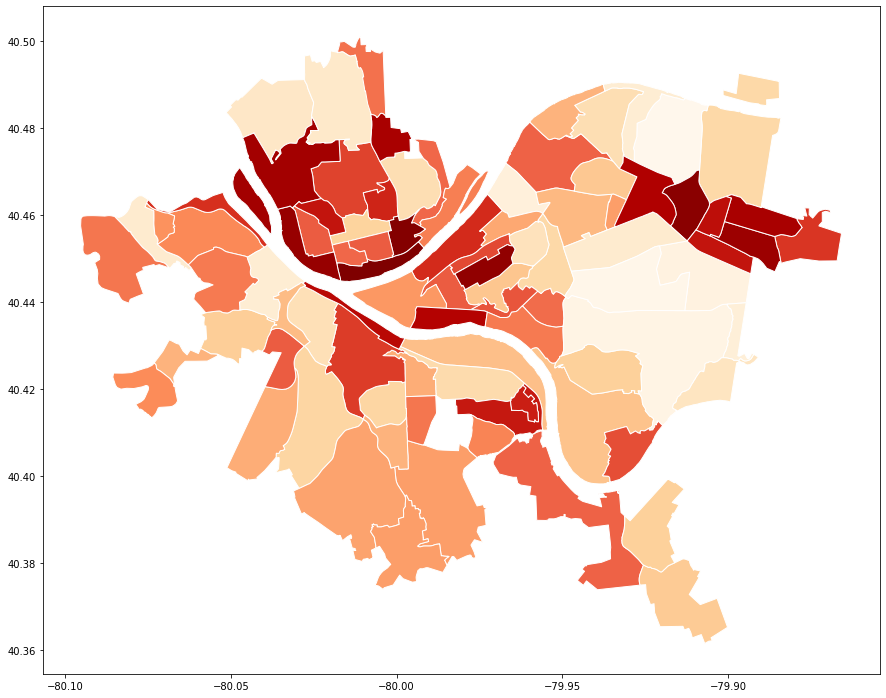

In [34]:
# Display data with GeoPandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
percmap = neighborhoods.merge(rankings, how = 'left', left_on = 'hood', right_on = 'Neighborhood')
percmap.plot(column = "Rank",
            cmap = 'OrRd',
            edgecolor = 'white',
            figsize = (15,15))

# Conclusion
So after comparing the different neighborhoods with our code, we were able to compute that the best neighborhood in Pittsburgh is in fact Highland Park! Highland Park had the lowest total score between all the different neighborhoods, meaning that on average, it ranked higher than all the other neighbrhoods in the different categories. 

#### Nij's Conclusion
At first, I was pretty surprised to see that Highland Park scored the best out of any other neighborhoods, as I had expected Squirrel Hill to take the cake. As we watched the different presentations in class, Squirrel Hill was often seen ranking #1, so it was very interesting to see it dethroned. However, a quick look at the rankings finds that both Squirrel Hill north and south ranked in the top 5, so it's not like they were completely disregarded. Having visited most of the top neighborhoods, I have to agree with my limited knowledge on them, as I found them to be pretty nice neighborhoods overall. 

#### Paolo's Conclusion
I wasn’t too surprised to find out that after our analysis concluded Highland Park was the highest-ranking neighborhood. In my personal analysis where I looked at each neighborhood’s public life, I noticed and pointed out that Highland Park ranked very high. It had the second-best score whenever we looked just at a neighborhood’s public life. So, I already knew that Highland Park had great public life, now we have the data to show that it is also very safe as well as a great place to raise a family. The other neighborhood that ranked in the top 5 didn’t surprise me much either is Squirrel Hill South. Squirrel Hill South ranked the highest in public life so to see it in the top 5 best neighborhoods isn’t very surprising. 

#### Jack's Conclusion
It didn’t come as a shock to me that the Squirrel Hills placed well after all the metrics were combined. The pair were consistently well ranked, and as anyone who has been there can attest to, it has pretty much everything you could want in a neighborhood, within reasonable expectations. Highland Park as the best overall neighborhood was a bit of a surprise to me, but after looking over the data it clearly deserves recognition. This project was a great way to get to know the neighborhoods better, even if it was mostly just statistical knowledge. I feel that the metrics our group identified and analyzed were some of the most critical when ranking the neighborhoods, and our data accurately reflects the situation and quality of life in each of Pittsburgh’s neighborhoods.